# Variational Eigen Solver for two qubit Hamiltonian using OH encoding with JW transformation - Noise model

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit-aer
!pip install 'qiskit[visualization]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.

In [ ]:
# General imports
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from qiskit.visualization import *

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit
from qiskit.visualization import *
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer.noise import NoiseModel

In [ ]:
# Loading your IBM Quantum account(s) and choosing QASM simulator
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend('ibmq_qasm_simulator')

AccountNotFoundError: 'Unable to find account.'

In [ ]:
#Hamiltonian
hamiltonian = SparsePauliOp.from_list([("II", 5.9067091), ("IZ", 0.218291),
                                       ("ZI", -6.125), ("XX", -2.143304), ("YY", -2.143304)])

In [ ]:
#Ansatze
from qiskit.circuit import Parameter

theta = Parameter('theta')
ansatz = QuantumCircuit(2)
ansatz.ry(theta,0)
ansatz.x(1)
ansatz.cx(0,1)
num_params = ansatz.num_parameters
ansatz.draw("mpl")

ModuleNotFoundError: No module named 'qiskit'

In [ ]:
#Function to calcuate energy
def cost_func(params, ansatz, hamiltonian, estimator):
    """Parameters:
       params (ndarray): Array of ansatz parameters
       ansatz (QuantumCircuit): Parameterized ansatz circuit
       hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
       estimator (EstimatorV2): Estimator primitive instance"""
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    return energy

In [ ]:
#Specify a random initial set of parameters:
x0 = 2 * np.pi * np.random.random(num_params)

NameError: name 'np' is not defined

In [ ]:
#QASM simulator without noise using StatevectorEstimator
from qiskit.primitives import StatevectorEstimator
estimator1 = StatevectorEstimator()

def minimization_withoutnoise(E):
    res = minimize(cost_func,x0,
                    args=(ansatz, hamiltonian, E),method="cobyla")
    return(res.fun)
True_value = minimization_withoutnoise(estimator1)
print('True_value:',True_value)

True_value: -1.7491610828953426


In [ ]:
runs = np.arange(1,21,1)
Energy_withoutnoise = []
for i in runs:
    Energy_withoutnoise.append(minimization_withoutnoise(estimator1))
print(Energy_withoutnoise)

[-1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426, -1.7491610828953426]


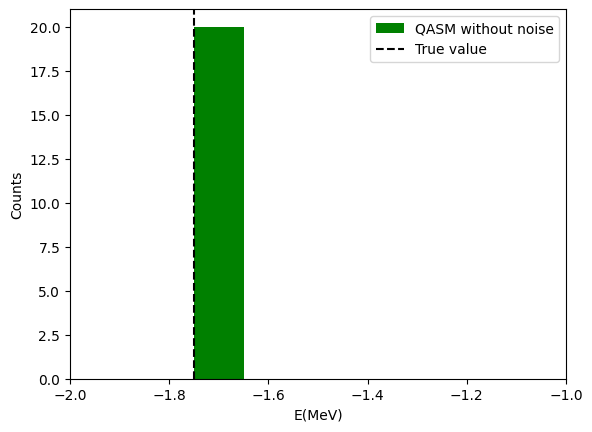

In [ ]:
plt.hist(np.array(Energy_withoutnoise),label = 'QASM without noise',color = 'green')
plt.xlabel('E(MeV)')
plt.ylabel('Counts')
plt.axvline(x = minimization_withoutnoise(estimator1),ymin = 0,ymax = 1,linestyle = '--',c = 'k',label = 'True value')
plt.xlim(-2,-1)
plt.legend()

In [ ]:
#Noise model without mitigation
noise_model = NoiseModel.from_backend(backend)
backend.set_options(noise_model=noise_model)

/opt/conda/lib/python3.10/site-packages/qiskit_aer/noise/noise_model.py:379: UserWarning: Qiskit backend <IBMBackend('ibmq_qasm_simulator')> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


In [ ]:
#QASM simulator with noise without mitigation
def minimization_noise(S):
    with Session(backend=backend) as session:
        estimator = Estimator(session=session)
        estimator.options.resilience_level=0
        estimator.options.default_shots = S

        res = minimize(
        cost_func,
        x0,
        args=(ansatz, hamiltonian, estimator),
        method="cobyla",
        # callback=callback
    )
    return(res.fun)
#Result
print('E_min =',minimization_noise(10))

base_primitive._run:INFO:2024-04-19 18:50:47,502: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)
base_primitive._run:INFO:2024-04-19 18:50:50,363: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:50:53,449: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:50:56,720: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:51:03,391: Submitting job using opti

E_min = -1.728116993750001


In [ ]:
Energy_withnoise = []
for i in runs:
    Energy_withnoise.append(minimization_noise(8000))
    print('Completed for runs=',i)
print('Emin_runs=',Energy_withnoise)

base_primitive._run:INFO:2024-04-19 18:52:02,323: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:52:05,459: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:52:11,018: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:52:15,123: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:52:18,658: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:52:25,187: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:52:28,262: Submitting job using optio

Completed for runs= 1


base_primitive._run:INFO:2024-04-19 18:53:30,700: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:53:33,715: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:53:39,664: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:53:42,996: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:53:46,818: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:53:50,471: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:53:53,558: Submitting job using optio

Completed for runs= 2


base_primitive._run:INFO:2024-04-19 18:54:46,424: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:54:57,620: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:55:01,047: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:55:06,631: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:55:10,807: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:55:14,034: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:55:17,421: Submitting job using optio

Completed for runs= 3


base_primitive._run:INFO:2024-04-19 18:56:19,738: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:56:24,229: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:56:27,354: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:56:30,600: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:56:34,337: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:56:37,543: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:56:40,915: Submitting job using optio

Completed for runs= 4


base_primitive._run:INFO:2024-04-19 18:57:47,127: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:57:50,626: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:57:56,889: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:57:59,967: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:58:03,155: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:58:06,083: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:58:09,583: Submitting job using optio

Completed for runs= 5


base_primitive._run:INFO:2024-04-19 18:59:12,341: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:59:15,728: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:59:19,352: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:59:24,837: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:59:30,460: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:59:33,661: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 18:59:36,975: Submitting job using optio

Completed for runs= 6


base_primitive._run:INFO:2024-04-19 19:00:42,796: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:00:48,351: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:00:51,467: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:00:54,674: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:00:58,290: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:01:01,434: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:01:06,989: Submitting job using optio

Completed for runs= 7


base_primitive._run:INFO:2024-04-19 19:02:11,718: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:02:15,717: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:02:19,261: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:02:22,292: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:02:25,694: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:02:29,090: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:02:32,295: Submitting job using optio

Completed for runs= 8


base_primitive._run:INFO:2024-04-19 19:03:42,297: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:03:45,820: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:03:49,963: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:03:52,905: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:03:56,289: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:03:59,655: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:04:03,074: Submitting job using optio

Completed for runs= 9


base_primitive._run:INFO:2024-04-19 19:05:07,301: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:05:10,826: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:05:14,393: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:05:20,598: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:05:23,716: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:05:26,711: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:05:32,306: Submitting job using optio

Completed for runs= 10


base_primitive._run:INFO:2024-04-19 19:06:36,296: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:06:39,913: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:06:43,332: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:06:48,915: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:06:52,372: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:06:58,843: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:07:02,841: Submitting job using optio

Completed for runs= 11


base_primitive._run:INFO:2024-04-19 19:07:59,690: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:08:03,181: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:08:07,120: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:08:10,868: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:08:14,184: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:08:20,082: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:08:25,804: Submitting job using optio

Completed for runs= 12


base_primitive._run:INFO:2024-04-19 19:09:19,197: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:09:22,833: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:09:25,957: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:09:32,954: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:09:36,930: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:09:40,064: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:09:43,088: Submitting job using optio

Completed for runs= 13


base_primitive._run:INFO:2024-04-19 19:10:42,134: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:10:46,270: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:10:49,268: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:10:52,210: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:10:55,268: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:10:58,301: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:11:01,970: Submitting job using optio

Completed for runs= 14


base_primitive._run:INFO:2024-04-19 19:12:00,268: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:12:03,489: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:12:07,500: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:12:10,960: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:12:14,707: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:12:18,194: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:12:21,135: Submitting job using optio

Completed for runs= 15


base_primitive._run:INFO:2024-04-19 19:13:23,514: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:13:27,528: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:13:31,167: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:13:35,114: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:13:41,065: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:13:45,059: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:13:50,226: Submitting job using optio

Completed for runs= 16


base_primitive._run:INFO:2024-04-19 19:14:43,743: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:14:46,996: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:14:50,280: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:14:53,436: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:14:56,617: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:15:01,725: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:15:09,564: Submitting job using optio

Completed for runs= 17


base_primitive._run:INFO:2024-04-19 19:16:09,234: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:16:12,556: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:16:15,650: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:16:21,268: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:16:24,245: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:16:27,326: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:16:33,620: Submitting job using optio

Completed for runs= 18


base_primitive._run:INFO:2024-04-19 19:17:37,577: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:17:40,736: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:17:43,989: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:17:47,611: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:17:51,170: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:17:54,221: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:17:57,267: Submitting job using optio

Completed for runs= 19


base_primitive._run:INFO:2024-04-19 19:19:03,231: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:19:07,259: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:19:10,584: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:19:13,615: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:19:16,848: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:19:21,590: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-19 19:19:24,901: Submitting job using optio

Completed for runs= 20
Emin_runs= [-1.7769576597500003, -1.6997826157499998, -1.719759764500001, -1.7308921580000005, -1.7633393362500014, -1.6722500477500009, -1.708944947250001, -1.6517414967500006, -1.6861915027500003, -1.697433304000001, -1.7765084547499996, -1.8112072132500008, -1.6275344240000003, -1.5988435830000003, -1.6696469940000003, -1.7529321107499993, -1.6237730972499995, -1.563376346, -1.6942333164999996, -1.7668585972500006]


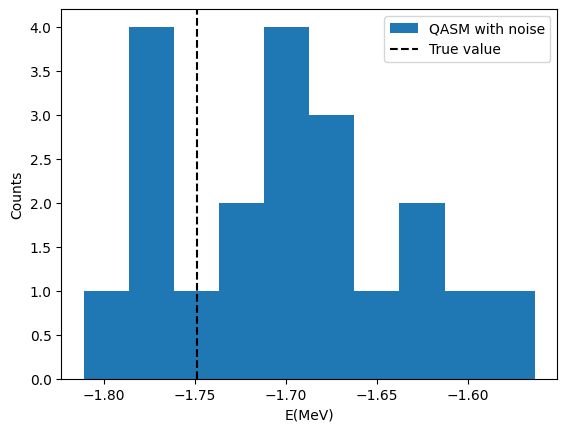

In [ ]:
plt.hist(np.array(Energy_withnoise),label = 'QASM with noise')
plt.xlabel('E(MeV)')
plt.ylabel('Counts')
plt.axvline(x = minimization_withoutnoise(estimator1),ymin = 0,ymax = 1,linestyle = '--',c = 'k',label = 'True value')
# plt.xlim(-2,-1)
plt.legend()

In [ ]:
#QASM simulator with noise mitigation
def minimization_noisemitigation(S):
    with Session(backend=backend) as session:
        estimator = Estimator(session=session)
        estimator.options.resilience_level=2
        estimator.options.default_shots = S

        res = minimize(
        cost_func,
        x0,
        args=(ansatz, hamiltonian, estimator),
        method="cobyla",
        # callback=callback
    )
    return(res.fun)

In [ ]:
Energy_noisemit = []
for i in runs:
    Energy_noisemit.append(minimization_noisemitigation(8000))
    print('Completed for runs=',i)
print('Emin_runs=',Energy_noisemit)

base_primitive._run:INFO:2024-04-19 19:21:44,124: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:21:47,710: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:21:51,597: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:21:58,550: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:22:02,407: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:22:06,182: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 1


base_primitive._run:INFO:2024-04-19 19:23:23,816: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:23:27,437: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:23:31,373: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:23:35,380: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:23:40,058: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:23:48,116: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 2


base_primitive._run:INFO:2024-04-19 19:24:55,988: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:25:00,590: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:25:09,544: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:25:13,575: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:25:17,521: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:25:21,308: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 3


base_primitive._run:INFO:2024-04-19 19:26:23,572: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:26:29,883: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:26:34,748: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:26:38,468: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:26:42,628: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:26:46,258: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 4


base_primitive._run:INFO:2024-04-19 19:27:55,892: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:27:59,816: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:28:04,432: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:28:09,682: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:28:13,746: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:28:17,369: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 5


base_primitive._run:INFO:2024-04-19 19:29:29,691: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:29:34,826: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:29:38,964: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:29:42,622: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:29:46,697: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:29:50,946: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 6


base_primitive._run:INFO:2024-04-19 19:31:09,984: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:31:13,586: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:31:17,828: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:31:25,263: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:31:28,820: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:31:32,469: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 7


base_primitive._run:INFO:2024-04-19 19:33:07,569: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:33:11,957: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:33:16,314: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:33:23,652: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:33:27,909: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:33:32,551: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 8


base_primitive._run:INFO:2024-04-19 19:34:59,076: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:35:04,679: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:35:09,256: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:35:13,389: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:35:16,842: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:35:21,115: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 9


base_primitive._run:INFO:2024-04-19 19:36:35,247: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:36:39,912: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:36:46,973: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:36:51,250: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:36:58,303: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:37:02,469: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 10


base_primitive._run:INFO:2024-04-19 19:38:32,392: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:38:36,414: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:38:39,874: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:38:47,311: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:38:51,735: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:38:56,032: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 11


base_primitive._run:INFO:2024-04-19 19:40:19,819: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:40:24,710: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:40:28,426: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:40:32,553: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:40:40,391: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:40:44,234: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 12


base_primitive._run:INFO:2024-04-19 19:42:04,484: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:42:08,812: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:42:13,076: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:42:20,244: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:42:23,820: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:44:28,440: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 13


base_primitive._run:INFO:2024-04-19 19:45:38,937: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:45:44,091: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:45:47,923: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:45:52,078: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:45:56,399: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:46:00,259: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 14


base_primitive._run:INFO:2024-04-19 19:47:17,369: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:47:25,431: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:47:29,066: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:47:33,190: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:47:36,948: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:47:40,568: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 15


base_primitive._run:INFO:2024-04-19 19:49:06,745: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:49:10,963: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:49:14,483: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:49:18,660: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:49:23,086: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:49:29,984: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 16


base_primitive._run:INFO:2024-04-19 19:50:49,586: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:50:54,061: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:50:58,204: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:51:03,054: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:51:07,146: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:51:11,767: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 17


base_primitive._run:INFO:2024-04-19 19:52:33,094: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:52:37,288: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:52:41,048: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:52:44,831: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:52:48,588: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:52:52,590: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 18


base_primitive._run:INFO:2024-04-19 19:54:11,022: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:54:15,632: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:54:20,795: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:54:24,767: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:54:29,245: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:54:36,609: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 19


base_primitive._run:INFO:2024-04-19 19:55:40,093: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:55:44,750: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:55:49,744: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:55:53,552: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:55:57,509: Submitting job using options {'options': {'default_shots': 8000}, 'version': 2, 'support_qiskit': True, 'resilience_level': 2}
base_primitive._run:INFO:2024-04-19 19:56:01,406: Submitting job using options {'options': {'default_shots': 8000},

Completed for runs= 20
Emin_runs= [-1.745083821150402, -1.7088743389181915, -1.531452630977424, -1.749611870523594, -1.7859172935227208, -1.5349495132308824, -1.8190413120258655, -1.7216236202170268, -1.652377018039691, -1.69251706321289, -1.7446293499778252, -1.6941136066436076, -1.7158315538308342, -1.5798247721133412, -1.7364364094437215, -1.7262385846173403, -1.7882367068020004, -1.680525280129788, -1.691862916238128, -1.7654137485303938]


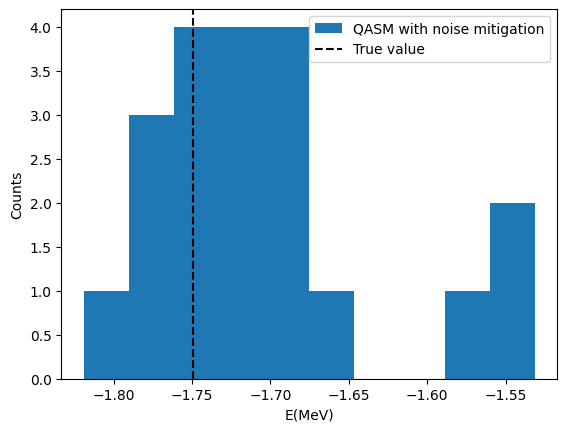

In [ ]:
plt.hist(np.array(Energy_noisemit),label = 'QASM with noise mitigation')
plt.xlabel('E(MeV)')
plt.ylabel('Counts')
plt.axvline(x = minimization_withoutnoise(estimator1),ymin = 0,ymax = 1,linestyle = '--',c = 'k',label = 'True value')
# plt.xlim(-2,-1)
plt.legend()

In [ ]:
# Energy_noisemit = [-1.747026025859479, -1.5836117003775518, -1.6399319750504695, -1.9443348190496148, -1.8601579398472374, -1.5931078414660447, -1.8495867397888652, -1.7387997481858575, -1.5167474153492049, -1.857705358806287, -1.8580669274615462, -1.596398309922586, -1.3858867561858332, -1.7546750338355626, -1.6519006497522648, -1.7873947396900465, -1.484789428917324, -1.6066322637533634, -1.2805190425579673, -1.8800928320411856]
fig = plt.figure()
gs = fig.add_gridspec(3,1, hspace=0)
(ax1, ax2, ax3) = gs.subplots(sharex=True)
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.hist(np.array(Energy_withoutnoise),label = 'QASM without noise',color = 'green')
ax2.hist(np.array(Energy_withnoise),label = 'QASM with noise',color = 'blue')
ax2.set_ylim(0,7)
ax3.hist(np.array(Energy_noisemit),label = 'QASM with noise mitigation',color = 'red')
ax1.axvline(x = minimization_withoutnoise(estimator1),ymin = 0,ymax = 1,linestyle = '--',c = 'k',label = 'True value')
ax2.axvline(x = minimization_withoutnoise(estimator1),ymin = 0,ymax = 1,linestyle = '--',c = 'k',label = 'True value')
ax3.axvline(x = minimization_withoutnoise(estimator1),ymin = 0,ymax = 1,linestyle = '--',c = 'k',label = 'True value')
ax3.legend()
ax2.legend()
ax1.legend()
plt.xlim(-2.02,-1.02)
ax3.set_ylim(0,7)
plt.xlabel('E(MeV)')
ax2.set_ylabel('Counts')

NameError: name 'plt' is not defined